# WeatherPy
----

Summary of Observations

1). As the latitude approaches 0, the tempuratures of the cities get hotter.

2). It is more humid at latitude 0 then other latitudes. As the lat approaches 20, humidity comes way down.

3). Cloudiness % is mostly random across all latitudes, however linear concentrations cross 0, 20, 40, and 78% percent are observed

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import gmaps


# Import API key
from api_keys import api_key
from api_keys import gkey


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

In [3]:
cities

['marawi',
 'aflu',
 'jamestown',
 'rikitea',
 'flinders',
 'yellowknife',
 'aguadulce',
 'lavrentiya',
 'hithadhoo',
 'tuktoyaktuk',
 'rawson',
 'kenora',
 'egvekinot',
 'umzimvubu',
 'barentsburg',
 'yevlax',
 'kamenskoye',
 'karad',
 'srednekolymsk',
 'hermanus',
 'puerto ayora',
 'kungurtug',
 'ndjole',
 'frutal',
 'dikson',
 'ancud',
 'castro',
 'kaitangata',
 'benguela',
 'mahebourg',
 'constitucion',
 'nanortalik',
 'chimoio',
 'mananjary',
 'busselton',
 'sentyabrskiy',
 'vaini',
 'qaanaaq',
 'umm durman',
 'fortuna',
 'mataura',
 'barrow',
 'byron bay',
 'meybod',
 'kyren',
 'evensk',
 'sao joao da ponte',
 'carnarvon',
 'hobart',
 'punta arenas',
 'katangli',
 'conde',
 'goure',
 'andenes',
 'lompoc',
 'ushuaia',
 'bluff',
 'albany',
 'banting',
 'taolanaro',
 'ondorhaan',
 'saldanha',
 'panambi',
 'nambucca heads',
 'talnakh',
 'touros',
 'burica',
 'qinhuangdao',
 'vaitupu',
 'aquiraz',
 'isiro',
 'emerald',
 'coquimbo',
 'tsihombe',
 'kodiak',
 'butaritari',
 'arraial do c

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
clouds = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp =[]
wind_speed = []
city2 = []
cityid = []


for cities in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={cities}&APPID={api_key}&units=imperial"
    print(url)
    weather_response= requests.get(url)
    print(weather_response)

    if weather_response.status_code == 200:
        print(weather_response)
        weather_json=weather_response.json()
        print(weather_json)
        city2.append(weather_json['name'])
        clouds.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        cityid.append(weather_json['id'])

http://api.openweathermap.org/data/2.5/weather?q=marawi&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': 124.29, 'lat': 8}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77, 'pressure': 1010, 'humidity': 87, 'temp_min': 77, 'temp_max': 77}, 'wind': {'speed': 1.99, 'deg': 226, 'gust': 5.99}, 'clouds': {'all': 100}, 'dt': 1566664982, 'sys': {'type': 3, 'id': 2007154, 'message': 0.0057, 'country': 'PH', 'sunrise': 1566682541, 'sunset': 1566726901}, 'timezone': 28800, 'id': 1701054, 'name': 'Marawi', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=aflu&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [404]>
http://api.openweathermap.org/data/2.5/weather?q=jamestown&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': 138.6, 'lat': -33.21}, 'weather': [{'id': 800, 'main': 

<Response [404]>
http://api.openweathermap.org/data/2.5/weather?q=karad&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': 74.18, 'lat': 17.29}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 67.81, 'pressure': 1009.59, 'humidity': 95, 'temp_min': 67.81, 'temp_max': 67.81, 'sea_level': 1009.59, 'grnd_level': 925.97}, 'wind': {'speed': 4.79, 'deg': 253.09}, 'clouds': {'all': 33}, 'dt': 1566665514, 'sys': {'message': 0.0085, 'country': 'IN', 'sunrise': 1566607694, 'sunset': 1566653028}, 'timezone': 19800, 'id': 1267904, 'name': 'Karad', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=srednekolymsk&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': 153.71, 'lat': 67.46}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'

<Response [200]>
<Response [200]>
{'coord': {'lon': 46.8, 'lat': -19.16}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 63.31, 'pressure': 1021.28, 'humidity': 67, 'temp_min': 63.31, 'temp_max': 63.31, 'sea_level': 1021.28, 'grnd_level': 910.01}, 'wind': {'speed': 9.53, 'deg': 69.394}, 'clouds': {'all': 0}, 'dt': 1566665515, 'sys': {'message': 0.0056, 'country': 'MG', 'sunrise': 1566616066, 'sunset': 1566657796}, 'timezone': 10800, 'id': 1056151, 'name': 'Mananjary', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=busselton&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': 115.35, 'lat': -33.64}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 45.63, 'pressure': 1019, 'humidity': 56, 'temp_min': 45, 'temp_max': 46.99}, 'wind': {'speed': 11.18, 'deg': 123.97}, 'c

<Response [200]>
<Response [200]>
{'coord': {'lon': 143.23, 'lat': 51.71}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 47.83, 'pressure': 1013, 'humidity': 96, 'temp_min': 47.83, 'temp_max': 47.83, 'sea_level': 1013, 'grnd_level': 1006.68}, 'wind': {'speed': 6.58, 'deg': 110.36}, 'clouds': {'all': 100}, 'dt': 1566665516, 'sys': {'message': 0.0058, 'country': 'RU', 'sunrise': 1566674818, 'sunset': 1566725534}, 'timezone': 39600, 'id': 2122783, 'name': 'Katangli', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=conde&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': -37.61, 'lat': -11.81}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 78.25, 'pressure': 1017.85, 'humidity': 68, 'temp_min': 78.25, 'temp_max': 78.25, 'sea_level': 1017.85, 'grnd_level': 1003.83},

<Response [404]>
http://api.openweathermap.org/data/2.5/weather?q=aquiraz&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': -38.39, 'lat': -3.9}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 84.47, 'pressure': 1015, 'humidity': 43, 'temp_min': 81, 'temp_max': 89.6}, 'visibility': 10000, 'wind': {'speed': 19.46, 'deg': 100}, 'clouds': {'all': 20}, 'dt': 1566665339, 'sys': {'type': 1, 'id': 8363, 'message': 0.0057, 'country': 'BR', 'sunrise': 1566635754, 'sunset': 1566678991}, 'timezone': -10800, 'id': 3407407, 'name': 'Aquiraz', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=isiro&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': 27.62, 'lat': 2.77}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 69.97, 'press

<Response [200]>
<Response [200]>
{'coord': {'lon': 141.3, 'lat': -6.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 70.15, 'pressure': 1012.57, 'humidity': 99, 'temp_min': 70.15, 'temp_max': 70.15, 'sea_level': 1012.57, 'grnd_level': 1005.65}, 'wind': {'speed': 2.17, 'deg': 102.078}, 'clouds': {'all': 62}, 'dt': 1566665518, 'sys': {'message': 0.0066, 'country': 'PG', 'sunrise': 1566679122, 'sunset': 1566722157}, 'timezone': 36000, 'id': 2093846, 'name': 'Kiunga', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=koping&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': 15.99, 'lat': 59.51}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 71.29, 'pressure': 1026, 'humidity': 56, 'temp_min': 71.01, 'temp_max': 71.6}, 'visibility': 10000, 'wind': {'speed': 3

<Response [200]>
<Response [200]>
{'coord': {'lon': -46, 'lat': -20.63}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 76.81, 'pressure': 1016.86, 'humidity': 27, 'temp_min': 76.81, 'temp_max': 76.81, 'sea_level': 1016.86, 'grnd_level': 909.69}, 'wind': {'speed': 7.34, 'deg': 192.775}, 'clouds': {'all': 0}, 'dt': 1566664941, 'sys': {'message': 0.0083, 'country': 'BR', 'sunrise': 1566638403, 'sunset': 1566679994}, 'timezone': -10800, 'id': 3453439, 'name': 'Ponta do Sol', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=kapaa&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': -159.32, 'lat': 22.08}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 78.12, 'pressure': 1015, 'humidity': 74, 'temp_min': 75, 'temp_max': 80.6}, 'visibility': 16093, 'wind': {'speed': 17.22

<Response [200]>
<Response [200]>
{'coord': {'lon': 88.66, 'lat': 49.99}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 38.65, 'pressure': 1022.14, 'humidity': 78, 'temp_min': 38.65, 'temp_max': 38.65, 'sea_level': 1022.14, 'grnd_level': 807.88}, 'wind': {'speed': 2.3, 'deg': 8.051}, 'clouds': {'all': 1}, 'dt': 1566665520, 'sys': {'message': 0.0077, 'country': 'RU', 'sunrise': 1566601660, 'sunset': 1566652113}, 'timezone': 25200, 'id': 1502422, 'name': 'Kosh-Agach', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=avera&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': -82.53, 'lat': 33.19}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 80.71, 'pressure': 1018, 'humidity': 94, 'temp_min': 77, 'temp_max': 84.2}, 'visibility': 16093, 'wind': {'speed': 8.05, 'deg'

<Response [200]>
<Response [200]>
{'coord': {'lon': 66.46, 'lat': 30.92}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 80.59, 'pressure': 1004.66, 'humidity': 13, 'temp_min': 80.59, 'temp_max': 80.59, 'sea_level': 1004.66, 'grnd_level': 874.84}, 'wind': {'speed': 9.35, 'deg': 303.393}, 'clouds': {'all': 0}, 'dt': 1566665521, 'sys': {'message': 0.0049, 'country': 'AF', 'sunrise': 1566608730, 'sunset': 1566655696}, 'timezone': 18000, 'id': 1181611, 'name': 'Chaman', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=new norfolk&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': 147.06, 'lat': -42.78}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 42.12, 'pressure': 1009, 'humidity': 65, 'temp_min': 41, 'temp_max': 44.6}, 'visibility': 10000, 'wind': {'speed': 13.8

<Response [200]>
<Response [200]>
{'coord': {'lon': 119.81, 'lat': 16.29}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 83.11, 'pressure': 1006.5, 'humidity': 81, 'temp_min': 83.11, 'temp_max': 83.11, 'sea_level': 1006.5, 'grnd_level': 1006.36}, 'wind': {'speed': 20.11, 'deg': 194.148}, 'rain': {'3h': 0.812}, 'clouds': {'all': 100}, 'dt': 1566665522, 'sys': {'message': 0.0054, 'country': 'PH', 'sunrise': 1566683205, 'sunset': 1566728387}, 'timezone': 28800, 'id': 1717787, 'name': 'Catuday', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=nuuk&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': -51.74, 'lat': 64.17}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 53.29, 'pressure': 1007, 'humidity': 50, 'temp_min': 53.01, 'temp_max': 53.6}, 'visibility': 10000, 'wind'

<Response [200]>
<Response [200]>
{'coord': {'lon': 24.71, 'lat': 62.26}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 61.92, 'pressure': 1024, 'humidity': 63, 'temp_min': 60.01, 'temp_max': 64}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 330}, 'clouds': {'all': 20}, 'dt': 1566665523, 'sys': {'type': 1, 'id': 1333, 'message': 0.0084, 'country': 'FI', 'sunrise': 1566614837, 'sunset': 1566669626}, 'timezone': 10800, 'id': 652977, 'name': 'Keuruu', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=hilo&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': -155.08, 'lat': 19.71}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 72.84, 'pressure': 1015, 'humidity': 73, 'temp_min': 70, 'temp_max': 75.2}, 'visibility': 4023, 'wind': {'speed': 3.36, 'deg': 190},

<Response [200]>
<Response [200]>
{'coord': {'lon': -55.99, 'lat': -4.26}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 93.2, 'pressure': 1013, 'humidity': 56, 'temp_min': 93.2, 'temp_max': 93.2}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 90}, 'clouds': {'all': 40}, 'dt': 1566665525, 'sys': {'type': 1, 'id': 8368, 'message': 0.0075, 'country': 'BR', 'sunrise': 1566639994, 'sunset': 1566683198}, 'timezone': -10800, 'id': 3397967, 'name': 'Itaituba', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=matinhos&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': -48.53, 'lat': -25.82}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 65.75, 'pressure': 1026, 'humidity': 59, 'temp_min': 64.99, 'temp_max': 66.2}, 'visibility': 10000, 'wind': {'speed': 6.93,

<Response [200]>
<Response [200]>
{'coord': {'lon': 111.83, 'lat': 2.29}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.07, 'pressure': 1011, 'humidity': 94, 'temp_min': 75, 'temp_max': 75.2}, 'visibility': 10000, 'wind': {'speed': 3.36}, 'clouds': {'all': 75}, 'dt': 1566665526, 'sys': {'type': 1, 'id': 9369, 'message': 0.0068, 'country': 'MY', 'sunrise': 1566685801, 'sunset': 1566729620}, 'timezone': 28800, 'id': 1735902, 'name': 'Sibu', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=hirara&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': 125.28, 'lat': 24.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 84.73, 'pressure': 1007.77, 'humidity': 80, 'temp_min': 84.73, 'temp_max': 84.73, 'sea_level': 1007.77, 'grnd_level': 1007.8}, 'wind': {'speed': 27.

<Response [200]>
<Response [200]>
{'coord': {'lon': 50.28, 'lat': -14.9}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 60.97, 'pressure': 1021.63, 'humidity': 94, 'temp_min': 60.97, 'temp_max': 60.97, 'sea_level': 1021.63, 'grnd_level': 972.9}, 'wind': {'speed': 4.14, 'deg': 227.284}, 'clouds': {'all': 73}, 'dt': 1566665527, 'sys': {'message': 0.0075, 'country': 'MG', 'sunrise': 1566615013, 'sunset': 1566657178}, 'timezone': 10800, 'id': 1071296, 'name': 'Antalaha', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=neyshabur&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': 58.79, 'lat': 36.21}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57.19, 'pressure': 1013.81, 'humidity': 25, 'temp_min': 57.19, 'temp_max': 57.19, 'sea_level': 1013.81, 'grnd_level': 843.19

<Response [200]>
<Response [200]>
{'coord': {'lon': 134.96, 'lat': 47.88}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 51.61, 'pressure': 1011.72, 'humidity': 96, 'temp_min': 51.61, 'temp_max': 51.61, 'sea_level': 1011.72, 'grnd_level': 1005.89}, 'wind': {'speed': 6.26, 'deg': 9.348}, 'clouds': {'all': 3}, 'dt': 1566665529, 'sys': {'message': 0.0058, 'country': 'RU', 'sunrise': 1566677275, 'sunset': 1566727047}, 'timezone': 36000, 'id': 2022317, 'name': 'Khor', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=nome&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': -94.42, 'lat': 30.04}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 83.86, 'pressure': 1013, 'humidity': 74, 'temp_min': 81, 'temp_max': 87.01}, 'visibility': 16093, 'wind': {'speed': 6.93, 'deg': 70}

<Response [200]>
<Response [200]>
{'coord': {'lon': -16.33, 'lat': 33.08}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 78.24, 'pressure': 1019, 'humidity': 73, 'temp_min': 75.2, 'temp_max': 80.6}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 20}, 'clouds': {'all': 40}, 'dt': 1566665530, 'sys': {'type': 1, 'id': 6902, 'message': 0.0074, 'country': 'PT', 'sunrise': 1566628459, 'sunset': 1566675700}, 'timezone': 3600, 'id': 2270385, 'name': 'Camacha', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=san cristobal&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': -86.92, 'lat': 14.68}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 87.97, 'pressure': 1013.06, 'humidity': 36, 'temp_min': 87.97, 'temp_max': 87.97, 'sea_level': 1013.06, 'grnd_level':

<Response [200]>
<Response [200]>
{'coord': {'lon': -66.34, 'lat': -33.3}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 75.55, 'pressure': 1012.7, 'humidity': 25, 'temp_min': 75.55, 'temp_max': 75.55, 'sea_level': 1012.7, 'grnd_level': 959.3}, 'wind': {'speed': 6.17, 'deg': 342.812}, 'clouds': {'all': 12}, 'dt': 1566665531, 'sys': {'message': 0.0069, 'country': 'AR', 'sunrise': 1566644018, 'sunset': 1566684141}, 'timezone': -10800, 'id': 3837056, 'name': 'San Luis', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=nouakchott&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': -15.98, 'lat': 18.08}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 86, 'pressure': 1011, 'humidity': 70, 'temp_min': 86, 'temp_max': 86}, 'visibility': 10000, 'wind': {'speed': 12.75, 'de

<Response [200]>
<Response [200]>
{'coord': {'lon': -105.62, 'lat': 28.39}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 79.23, 'pressure': 1022, 'humidity': 57, 'temp_min': 77, 'temp_max': 82}, 'visibility': 16093, 'wind': {'speed': 6.53, 'deg': 252.433}, 'clouds': {'all': 75}, 'dt': 1566665533, 'sys': {'type': 1, 'id': 7111, 'message': 0.0055, 'country': 'MX', 'sunrise': 1566650212, 'sunset': 1566696798}, 'timezone': -21600, 'id': 3996234, 'name': 'Lazaro Cardenas', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=broken hill&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': 141.45, 'lat': -31.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 50, 'pressure': 1020, 'humidity': 71, 'temp_min': 50, 'temp_max': 50}, 'visibility': 10000, 'wind': {'speed': 18.34, '

<Response [200]>
<Response [200]>
{'coord': {'lon': -119.2, 'lat': 56.5}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 61.69, 'pressure': 1002.27, 'humidity': 54, 'temp_min': 61.69, 'temp_max': 61.69, 'sea_level': 1002.27, 'grnd_level': 920.97}, 'wind': {'speed': 9.22, 'deg': 250.423}, 'clouds': {'all': 77}, 'dt': 1566665534, 'sys': {'message': 0.0076, 'country': 'CA', 'sunrise': 1566650644, 'sunset': 1566702883}, 'timezone': -21600, 'id': 6184594, 'name': 'Marina', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=bathsheba&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': -59.52, 'lat': 13.22}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 87.8, 'pressure': 1016, 'humidity': 66, 'temp_min': 87.8, 'temp_max': 87.8}, 'visibility': 10000, 'wind': {'speed':

<Response [200]>
<Response [200]>
{'coord': {'lon': 87.96, 'lat': 65.8}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 55.39, 'pressure': 1003.97, 'humidity': 72, 'temp_min': 55.39, 'temp_max': 55.39, 'sea_level': 1003.97, 'grnd_level': 1001.3}, 'wind': {'speed': 6.96, 'deg': 127.261}, 'clouds': {'all': 100}, 'dt': 1566665536, 'sys': {'message': 0.0061, 'country': 'RU', 'sunrise': 1566598570, 'sunset': 1566655538}, 'timezone': 25200, 'id': 1488903, 'name': 'Turukhansk', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=acarau&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [404]>
http://api.openweathermap.org/data/2.5/weather?q=cidreira&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': -50.22, 'lat': -30.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': 

<Response [200]>
<Response [200]>
{'coord': {'lon': -59.66, 'lat': -33.68}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 64, 'pressure': 1022, 'humidity': 61, 'temp_min': 64, 'temp_max': 64}, 'wind': {'speed': 5.01, 'gust': 10}, 'clouds': {'all': 100}, 'dt': 1566665537, 'sys': {'type': 3, 'id': 2018319, 'message': 0.0067, 'country': 'AR', 'sunrise': 1566642441, 'sunset': 1566682512}, 'timezone': -10800, 'id': 3428576, 'name': 'San Pedro', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=iskateley&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': 53.15, 'lat': 67.68}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 39.19, 'pressure': 1016.84, 'humidity': 94, 'temp_min': 39.19, 'temp_max': 39.19, 'sea_level': 1016.84, 'grnd_level': 1013.62}, 'wind': {'spee

<Response [200]>
<Response [200]>
{'coord': {'lon': -121.92, 'lat': 36.62}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 63.23, 'pressure': 1014, 'humidity': 77, 'temp_min': 60.01, 'temp_max': 68}, 'visibility': 14484, 'wind': {'speed': 8.43, 'deg': 230.852}, 'clouds': {'all': 40}, 'dt': 1566665539, 'sys': {'type': 1, 'id': 5885, 'message': 0.0094, 'country': 'US', 'sunrise': 1566653551, 'sunset': 1566701282}, 'timezone': -25200, 'id': 5380437, 'name': 'Pacific Grove', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=kavieng&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': 150.8, 'lat': -2.57}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 82.21, 'pressure': 1008.25, 'humidity': 78, 'temp_min': 82.21, 'temp_max': 82.21, 'sea_level': 1008.25, 'grnd_lev

<Response [200]>
<Response [200]>
{'coord': {'lon': -58.03, 'lat': -33.25}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 66.99, 'pressure': 1023, 'humidity': 49, 'temp_min': 66.99, 'temp_max': 66.99}, 'wind': {'speed': 7, 'gust': 21}, 'clouds': {'all': 100}, 'dt': 1566665540, 'sys': {'type': 3, 'id': 2019898, 'message': 0.0072, 'country': 'UY', 'sunrise': 1566642022, 'sunset': 1566682149}, 'timezone': -10800, 'id': 3441684, 'name': 'Mercedes', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=warqla&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [404]>
http://api.openweathermap.org/data/2.5/weather?q=tarandacuao&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': -100.52, 'lat': 20}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 71.22, 'pres

<Response [200]>
<Response [200]>
{'coord': {'lon': 34.86, 'lat': -4.97}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 70.15, 'pressure': 1015.86, 'humidity': 56, 'temp_min': 70.15, 'temp_max': 70.15, 'sea_level': 1015.86, 'grnd_level': 870.21}, 'wind': {'speed': 14.61, 'deg': 92.212}, 'clouds': {'all': 86}, 'dt': 1566665542, 'sys': {'message': 0.0057, 'country': 'TZ', 'sunrise': 1566618230, 'sunset': 1566661362}, 'timezone': 10800, 'id': 152546, 'name': 'Mungaa', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=shellbrook&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': -106.39, 'lat': 53.22}, 'weather': [{'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 64.4, 'pressure': 1005, 'humidity': 93, 'temp_min': 64.4, 'temp_max': 64.4}, 'visibility': 9656, 'wind': 

<Response [200]>
<Response [200]>
{'coord': {'lon': -22.43, 'lat': 63.84}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 55.4, 'pressure': 1012, 'humidity': 76, 'temp_min': 55.4, 'temp_max': 55.4}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 290}, 'clouds': {'all': 20}, 'dt': 1566665543, 'sys': {'type': 1, 'id': 90, 'message': 0.008, 'country': 'IS', 'sunrise': 1566625742, 'sunset': 1566681344}, 'timezone': 0, 'id': 3416888, 'name': 'Grindavik', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=tuggurt&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [404]>
http://api.openweathermap.org/data/2.5/weather?q=chagoda&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': 35.33, 'lat': 59.16}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 54.13, 'pressur

<Response [200]>
<Response [200]>
{'coord': {'lon': 71.76, 'lat': 54.36}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 57.37, 'pressure': 1017.67, 'humidity': 78, 'temp_min': 57.37, 'temp_max': 57.37, 'sea_level': 1017.67, 'grnd_level': 1003.56}, 'wind': {'speed': 8.19, 'deg': 282.767}, 'clouds': {'all': 20}, 'dt': 1566665545, 'sys': {'message': 0.0062, 'country': 'RU', 'sunrise': 1566605105, 'sunset': 1566656778}, 'timezone': 21600, 'id': 1494500, 'name': 'Poltavka', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=alta floresta&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': -56.08, 'lat': -9.87}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 95, 'pressure': 1015, 'humidity': 36, 'temp_min': 95, 'temp_max': 95}, 'visibility': 10000, 'wind': {'speed': 4.7, 'de

<Response [200]>
{'coord': {'lon': -36.64, 'lat': -5.11}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 81.67, 'pressure': 1013.31, 'humidity': 67, 'temp_min': 81.67, 'temp_max': 81.67, 'sea_level': 1013.31, 'grnd_level': 1005.45}, 'wind': {'speed': 19.62, 'deg': 55.248}, 'clouds': {'all': 31}, 'dt': 1566664961, 'sys': {'message': 0.0057, 'country': 'BR', 'sunrise': 1566635392, 'sunset': 1566678514}, 'timezone': -10800, 'id': 3395998, 'name': 'Macau', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=erie&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': -80.09, 'lat': 42.13}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 67.51, 'pressure': 1025, 'humidity': 43, 'temp_min': 64.4, 'temp_max': 71.6}, 'visibility': 16093, 'wind': {'speed': 12.75, 'deg': 30}, 'cl

<Response [200]>
<Response [200]>
{'coord': {'lon': 169.27, 'lat': -19.55}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 68.17, 'pressure': 1017.08, 'humidity': 69, 'temp_min': 68.17, 'temp_max': 68.17, 'sea_level': 1017.08, 'grnd_level': 1017.22}, 'wind': {'speed': 18.95, 'deg': 120.927}, 'clouds': {'all': 90}, 'dt': 1566665547, 'sys': {'message': 0.0063, 'country': 'VU', 'sunrise': 1566673063, 'sunset': 1566714792}, 'timezone': 39600, 'id': 2136825, 'name': 'Isangel', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=carballo&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': -8.69, 'lat': 43.21}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 69.46, 'pressure': 1019, 'humidity': 68, 'temp_min': 66.99, 'temp_max': 75.2}, 'visibility': 10000, 'wind': {'speed': 9

<Response [200]>
<Response [200]>
{'coord': {'lon': -56.15, 'lat': 72.79}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 42.79, 'pressure': 1008.45, 'humidity': 62, 'temp_min': 42.79, 'temp_max': 42.79, 'sea_level': 1008.45, 'grnd_level': 1009.21}, 'wind': {'speed': 6.55, 'deg': 163.237}, 'clouds': {'all': 39}, 'dt': 1566665549, 'sys': {'message': 0.0057, 'country': 'GL', 'sunrise': 1566629638, 'sunset': 1566693630}, 'timezone': -7200, 'id': 3418910, 'name': 'Upernavik', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=tunxi&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [404]>
http://api.openweathermap.org/data/2.5/weather?q=edeia&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': -49.93, 'lat': -17.34}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'

<Response [200]>
<Response [200]>
{'coord': {'lon': 32.67, 'lat': 49.08}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.39, 'pressure': 1022.34, 'humidity': 62, 'temp_min': 73.39, 'temp_max': 73.39, 'sea_level': 1022.34, 'grnd_level': 1003.03}, 'wind': {'speed': 9.98, 'deg': 40.322}, 'clouds': {'all': 0}, 'dt': 1566665550, 'sys': {'message': 0.0072, 'country': 'UA', 'sunrise': 1566615224, 'sunset': 1566665419}, 'timezone': 10800, 'id': 710473, 'name': 'Chyhyryn', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=aksarka&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': 67.8, 'lat': 66.56}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 44.77, 'pressure': 1008.58, 'humidity': 70, 'temp_min': 44.77, 'temp_max': 44.77, 'sea_level': 1008.58, 'grnd_level': 1002.76}

<Response [200]>
<Response [200]>
{'coord': {'lon': -96.41, 'lat': 42.47}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 72.1, 'pressure': 1020, 'humidity': 68, 'temp_min': 69.8, 'temp_max': 75}, 'visibility': 16093, 'wind': {'speed': 16.11, 'deg': 150, 'gust': 23.04}, 'clouds': {'all': 75}, 'dt': 1566665552, 'sys': {'type': 1, 'id': 4754, 'message': 0.0081, 'country': 'US', 'sunrise': 1566646930, 'sunset': 1566695660}, 'timezone': -18000, 'id': 5079250, 'name': 'South Sioux City', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=hovd&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': 10.7, 'lat': 63.83}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 60.73, 'pressure': 1021, 'humidity': 82, 'temp_min': 57.99, 'temp_max': 64}, 'visibility': 10000, 'wind': {'speed':

<Response [200]>
<Response [200]>
{'coord': {'lon': 14.96, 'lat': -20.37}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.21, 'pressure': 1017.26, 'humidity': 14, 'temp_min': 73.21, 'temp_max': 73.21, 'sea_level': 1017.26, 'grnd_level': 933.19}, 'wind': {'speed': 5.64, 'deg': 25.242}, 'clouds': {'all': 0}, 'dt': 1566665554, 'sys': {'message': 0.0061, 'country': 'NA', 'sunrise': 1566623767, 'sunset': 1566665375}, 'timezone': 7200, 'id': 3356213, 'name': 'Khorixas', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=blonduos&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [404]>
http://api.openweathermap.org/data/2.5/weather?q=xinmin&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': 122.83, 'lat': 42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 64.4, 

<Response [200]>
<Response [200]>
{'coord': {'lon': 70.79, 'lat': 52.83}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 57.55, 'pressure': 1018.97, 'humidity': 84, 'temp_min': 57.55, 'temp_max': 57.55, 'sea_level': 1018.97, 'grnd_level': 972.28}, 'wind': {'speed': 5.12, 'deg': 304.885}, 'clouds': {'all': 89}, 'dt': 1566665555, 'sys': {'message': 0.0054, 'country': 'KZ', 'sunrise': 1566605569, 'sunset': 1566656780}, 'timezone': 21600, 'id': 1518768, 'name': 'Stepnyak', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=moranbah&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': 148.04, 'lat': -22}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 54.85, 'pressure': 1019.74, 'humidity': 90, 'temp_min': 54.85, 'temp_max': 54.85, 'sea_level': 1019.74, 'grnd_level': 988

<Response [200]>
<Response [200]>
{'coord': {'lon': 78.62, 'lat': 30.78}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 43.51, 'pressure': 1011.01, 'humidity': 96, 'temp_min': 43.51, 'temp_max': 43.51, 'sea_level': 1011.01, 'grnd_level': 634.1}, 'wind': {'speed': 1.54, 'deg': 270.668}, 'clouds': {'all': 100}, 'dt': 1566665556, 'sys': {'message': 0.0058, 'country': 'IN', 'sunrise': 1566605820, 'sunset': 1566652771}, 'timezone': 19800, 'id': 1253628, 'name': 'Lata', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=araouane&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': -3.53, 'lat': 18.9}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 96.43, 'pressure': 1006.88, 'humidity': 34, 'temp_min': 96.43, 'temp_max': 96.43, 'sea_level': 1006.88, 'grnd_level': 975.

<Response [200]>
<Response [200]>
{'coord': {'lon': 84.01, 'lat': 24.95}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 81.49, 'pressure': 1001.93, 'humidity': 87, 'temp_min': 81.49, 'temp_max': 81.49, 'sea_level': 1001.93, 'grnd_level': 989.17}, 'wind': {'speed': 6.38, 'deg': 86.82}, 'rain': {'3h': 2.937}, 'clouds': {'all': 96}, 'dt': 1566665558, 'sys': {'message': 0.0057, 'country': 'IN', 'sunrise': 1566604899, 'sunset': 1566651105}, 'timezone': 19800, 'id': 1273309, 'name': 'Sasaram', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=iqaluit&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': -68.52, 'lat': 63.75}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 46.4, 'pressure': 1013, 'humidity': 70, 'temp_min': 46.4, 'temp_max': 46.4}, 'visibility': 48279, 'wi

<Response [200]>
<Response [200]>
{'coord': {'lon': 39.26, 'lat': -15.12}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 67.27, 'pressure': 1020.96, 'humidity': 86, 'temp_min': 67.27, 'temp_max': 67.27, 'sea_level': 1020.96, 'grnd_level': 967.85}, 'wind': {'speed': 4.63, 'deg': 206.317}, 'clouds': {'all': 33}, 'dt': 1566665560, 'sys': {'message': 0.0062, 'country': 'MZ', 'sunrise': 1566617668, 'sunset': 1566659812}, 'timezone': 7200, 'id': 1033356, 'name': 'Nampula', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=la ronge&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': -105.3, 'lat': 55.1}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 59, 'pressure': 1006, 'humidity': 87, 'temp_min': 59, 'temp_max': 59}, 'visibility': 24140, 'wind': {'spe

<Response [200]>
<Response [200]>
{'coord': {'lon': 43.19, 'lat': 53.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59.35, 'pressure': 1022.33, 'humidity': 68, 'temp_min': 59.35, 'temp_max': 59.35, 'sea_level': 1022.33, 'grnd_level': 1004.05}, 'wind': {'speed': 3.58, 'deg': 289.321}, 'clouds': {'all': 6}, 'dt': 1566665561, 'sys': {'message': 0.0062, 'country': 'RU', 'sunrise': 1566612037, 'sunset': 1566663557}, 'timezone': 10800, 'id': 482123, 'name': 'Spassk', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=sfantu gheorghe&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': 26.83, 'lat': 44.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 87.33, 'pressure': 1020, 'humidity': 35, 'temp_min': 86, 'temp_max': 89.01}, 'visibility': 10000, 'wind': {'speed': 11.41, 'd

<Response [200]>
<Response [200]>
{'coord': {'lon': -86.68, 'lat': 12.34}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 88.7, 'pressure': 1012, 'humidity': 62, 'temp_min': 87.8, 'temp_max': 89.6}, 'visibility': 10000, 'wind': {'speed': 1.21, 'deg': 17.568}, 'clouds': {'all': 40}, 'dt': 1566665563, 'sys': {'type': 1, 'id': 7172, 'message': 0.0068, 'country': 'NI', 'sunrise': 1566646561, 'sunset': 1566691360}, 'timezone': -21600, 'id': 3618411, 'name': 'La Paz Centro', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=dubbo&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': 148.6, 'lat': -32.25}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 41, 'pressure': 1017, 'humidity': 60, 'temp_min': 41, 'temp_max': 41}, 'visibility': 10000, 'wind': {'speed': 1.01, 'deg': 

<Response [200]>
<Response [200]>
{'coord': {'lon': 145.42, 'lat': -16.99}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 59.94, 'pressure': 1016, 'humidity': 82, 'temp_min': 57, 'temp_max': 62.6}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 130}, 'clouds': {'all': 13}, 'dt': 1566665564, 'sys': {'type': 1, 'id': 9490, 'message': 0.0066, 'country': 'AU', 'sunrise': 1566678655, 'sunset': 1566720646}, 'timezone': 36000, 'id': 2158767, 'name': 'Mareeba', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=lamont&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': -112.78, 'lat': 53.76}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 63.09, 'pressure': 1005, 'humidity': 86, 'temp_min': 62.01, 'temp_max': 64.99}, 'wind': {'speed': 1.01, 'deg': 270, 'gust': 4}, 'c

<Response [200]>
<Response [200]>
{'coord': {'lon': 36.93, 'lat': -4.2}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 60.43, 'pressure': 1019.62, 'humidity': 80, 'temp_min': 60.43, 'temp_max': 60.43, 'sea_level': 1019.62, 'grnd_level': 856.79}, 'wind': {'speed': 16.67, 'deg': 115.12}, 'clouds': {'all': 100}, 'dt': 1566665566, 'sys': {'message': 0.0059, 'country': 'TZ', 'sunrise': 1566617696, 'sunset': 1566660902}, 'timezone': 10800, 'id': 152042, 'name': 'Naberera', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=nagapattinam&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': 79.84, 'lat': 10.76}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 81.85, 'pressure': 1008.65, 'humidity': 65, 'temp_min': 81.85, 'temp_max': 81.85, 'sea_level': 1008.65, 'grnd_le

<Response [200]>
<Response [200]>
{'coord': {'lon': 126.55, 'lat': 7.69}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 72.67, 'pressure': 1009.47, 'humidity': 87, 'temp_min': 72.67, 'temp_max': 72.67, 'sea_level': 1009.47, 'grnd_level': 965.96}, 'wind': {'speed': 3.85, 'deg': 260.231}, 'clouds': {'all': 100}, 'dt': 1566665568, 'sys': {'message': 0.0062, 'country': 'PH', 'sunrise': 1566682013, 'sunset': 1566726344}, 'timezone': 28800, 'id': 1708743, 'name': 'Kinablangan', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=kizhinga&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': 109.91, 'lat': 51.85}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 57.01, 'pressure': 1007.5, 'humidity': 97, 'temp_min': 57.01, 'temp_max': 57.01, 'sea_level': 1007.5, 'grnd_level': 9

<Response [200]>
<Response [200]>
{'coord': {'lon': 29.13, 'lat': -28.27}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 56.11, 'pressure': 1024.04, 'humidity': 16, 'temp_min': 56.11, 'temp_max': 56.11, 'sea_level': 1024.04, 'grnd_level': 832.47}, 'wind': {'speed': 8.61, 'deg': 284.275}, 'clouds': {'all': 0}, 'dt': 1566665569, 'sys': {'message': 0.0158, 'country': 'ZA', 'sunrise': 1566620810, 'sunset': 1566661532}, 'timezone': 7200, 'id': 997751, 'name': 'Harrismith', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=karratha&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': 116.85, 'lat': -20.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 63.85, 'pressure': 1015.18, 'humidity': 60, 'temp_min': 63.85, 'temp_max': 63.85, 'sea_level': 1015.18, 'grnd_level': 1004.55},

<Response [200]>
<Response [200]>
{'coord': {'lon': 122.97, 'lat': 39.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 62.77, 'pressure': 1011.7, 'humidity': 91, 'temp_min': 62.77, 'temp_max': 62.77, 'sea_level': 1011.7, 'grnd_level': 984.45}, 'wind': {'speed': 4.03, 'deg': 337.644}, 'clouds': {'all': 0}, 'dt': 1566665571, 'sys': {'message': 0.0064, 'country': 'CN', 'sunrise': 1566680946, 'sunset': 1566729129}, 'timezone': 28800, 'id': 1784055, 'name': 'Zhuanghe', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=havoysund&APPID=f3529c62809b94ef4ac51f5a35e31ecd&units=imperial
<Response [200]>
<Response [200]>
{'coord': {'lon': 24.66, 'lat': 71}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 44.6, 'pressure': 1025, 'humidity': 70, 'temp_min': 44.6, 'temp_max': 44.6}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert to DataFrame
weather_df = pd.DataFrame(columns={"City" : city2,
                                "Cloudiness" : clouds,
                                "Country" : country,
                                "Date" : date,
                                "Humidity" : humidity,
                                "Lat" : lat,
                                "Lng" : lng, 
                                "Max Temp" : max_temp,
                                "Wind Speed" : wind_speed})

weather_df["City"] = city2
weather_df["Cloudiness"] = clouds
weather_df["Country"] = country
weather_df["Date"] = date
weather_df["Humidity"] = humidity
weather_df["Lat"] = lat
weather_df["Lng"] = lng
weather_df["Max Temp"] = max_temp
weather_df["Wind Speed"] = wind_speed

export_csv = weather_df.to_csv (r'../WeatherPy/weather_df.csv', index = None, header=True) 
weather_df.head()

city_name_df = pd.DataFrame(columns={"City Name" : city2,
                                "City Number" : cityid})
city_name_df["City Name"] = city2
city_name_df["City Number"] = cityid
export_csv = city_name_df.to_csv (r'../WeatherPy/city_name_number_df.csv', index = None, header=True) 
city_name_df.head()

,City Name,City Number
0,Marawi,1701054
1,Jamestown,2069194
2,Rikitea,4030556
3,Flinders,6255012
4,Yellowknife,6185377


In [6]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Marawi,100,PH,1566664982,87,8.00,124.29,77.00,1.99
1,Jamestown,0,AU,1566664925,95,-33.21,138.60,38.29,5.06
2,Rikitea,80,PF,1566664917,68,-23.12,-134.97,70.33,20.96
3,Flinders,0,AU,1566664930,33,-34.58,150.85,61.00,8.05
4,Yellowknife,90,CA,1566664929,93,62.45,-114.38,51.80,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

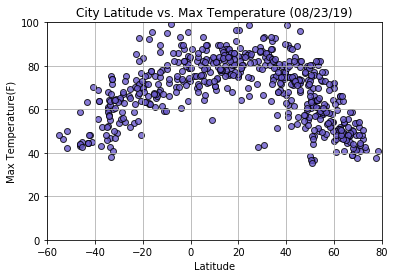

In [7]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker="o", alpha=0.8, edgecolors="black", color='slateblue')

# Incorporate the other graph properties
x_limit = 80
y_limt = 100
plt.ylim(0, y_limt)
plt.xlim(-60, x_limit)

plt.grid()

plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
chart_title = ('City Latitude vs. Max Temperature (08/23/19)')
plt.title(chart_title)


# Save Figure
plt.savefig('../WeatherPy/Lat_Temp.png', bbox_inches='tight')
plt.show()
plt.close()

#### Latitude vs. Humidity Plot

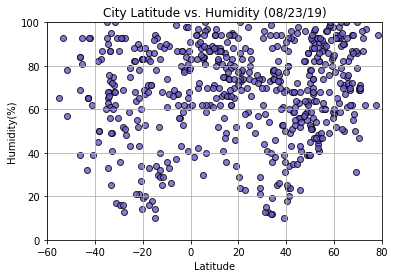

In [8]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker="o", alpha=0.8, edgecolors="black", color='slateblue')

# Incorporate the other graph properties
x_limit = 80
y_limt = 100
plt.ylim(0, y_limt)
plt.xlim(-60, x_limit)

plt.grid()

plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
chart_title = ('City Latitude vs. Humidity (08/23/19)')
plt.title(chart_title)


# Save Figure
plt.savefig('../WeatherPy/Hum.png', bbox_inches='tight')
plt.show()
plt.close()

#### Latitude vs. Cloudiness Plot

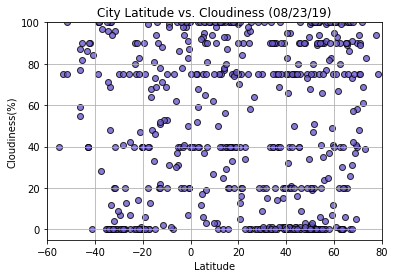

In [9]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker="o", alpha=0.8, edgecolors="black", color='slateblue')

# Incorporate the other graph properties
x_limit = 80
y_limt = 100
plt.ylim(-5, y_limt)
plt.xlim(-60, x_limit)

plt.grid()

plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
chart_title = ('City Latitude vs. Cloudiness (08/23/19)')
plt.title(chart_title)


# Save Figure
plt.savefig('../WeatherPy/cloud.png', bbox_inches='tight')
plt.show()
plt.close()

#### Latitude vs. Wind Speed Plot

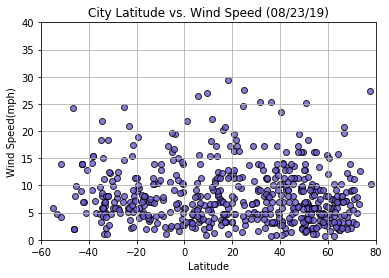

In [10]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker="o", alpha=0.8, edgecolors="black", color='slateblue')

# Incorporate the other graph properties
x_limit = 80
y_limt = 40
plt.ylim(0, y_limt)
plt.xlim(-60, x_limit)

plt.grid()

plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
chart_title = ('City Latitude vs. Wind Speed (08/23/19)')
plt.title(chart_title)


# Save Figure
plt.savefig('../WeatherPy/wind.png', bbox_inches='tight')
plt.show()
plt.close()

# Bonus Section - Mapping Cities and Weather on Google Maps

In [11]:
gmaps.configure(api_key=gkey)
locations = weather_df[["Lat", "Lng"]].astype(float)
tempurature = weather_df['Max Temp'].astype(float)

In [12]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=tempurature, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))